In [2]:
import os
import sys

# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline

from glycemic_patterns.model import Model
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

file = "data/ACN_20160331_20160414_FREE_STYLE.txt"
raw_data = pd.read_csv(file, header=0, skiprows=1, delimiter="\t", index_col=0,
                                       usecols=list(range(0, 9)),
                                       parse_dates=['Hora'], decimal=",",
                                       date_parser=lambda x: pd.to_datetime(x, format="%Y/%m/%d %H:%M"))                     
raw_data[["Hora", "Tipo de registro", "Histórico glucosa (mg/dL)"]].head()

,Hora,Tipo de registro,Histórico glucosa (mg/dL)
ID,,,
36781,2016-03-31 15:44:00,1,NaN
36817,2016-03-31 15:43:00,0,61.0
36818,2016-03-31 15:58:00,0,61.0
36819,2016-03-31 16:13:00,0,71.0
36820,2016-03-31 16:28:00,0,80.0


In [3]:
data = raw_data[raw_data["Tipo de registro"] == 0][
["Hora","Histórico glucosa (mg/dL)"]].set_index("Hora", drop=True)
data.head()

,Histórico glucosa (mg/dL)
Hora,
2016-03-31 15:43:00,61.0
2016-03-31 15:58:00,61.0
2016-03-31 16:13:00,71.0
2016-03-31 16:28:00,80.0
2016-03-31 16:43:00,83.0


In [4]:
data.shift(periods=4).head(10)

,Histórico glucosa (mg/dL)
Hora,
2016-03-31 15:43:00,NaN
2016-03-31 15:58:00,NaN
2016-03-31 16:13:00,NaN
2016-03-31 16:28:00,NaN
2016-03-31 16:43:00,61.0
2016-03-31 16:58:00,61.0
2016-03-31 17:14:00,71.0
2016-03-31 17:29:00,80.0
2016-03-31 17:44:00,83.0


In [5]:
data.shift(periods=-4).tail(10)

,Histórico glucosa (mg/dL)
Hora,
2016-04-14 03:45:00,264.0
2016-04-14 04:00:00,257.0
2016-04-14 04:15:00,250.0
2016-04-14 04:30:00,242.0
2016-04-14 04:45:00,231.0
2016-04-14 05:00:00,223.0
2016-04-14 05:15:00,NaN
2016-04-14 05:30:00,NaN
2016-04-14 05:45:00,NaN


In [6]:
X = pd.concat([data.shift(periods=-1),data.shift(periods=1)], axis=1).dropna()
X.columns = ["Glucose_Minus_15min", "Glucose_Plus_15min" ]
X.head()

,Glucose_Minus_15min,Glucose_Plus_15min
Hora,,
2016-03-31 15:58:00,71.0,61.0
2016-03-31 16:13:00,80.0,61.0
2016-03-31 16:28:00,83.0,71.0
2016-03-31 16:43:00,83.0,80.0
2016-03-31 16:58:00,75.0,83.0


In [7]:
def label_map(value):
    hypoglycemia_threshold = 70
    hyperglycemia_threshold = 180
    if value > hyperglycemia_threshold:
        return 0
    elif value < hypoglycemia_threshold:
        return 1
    else:
        return 2

In [8]:
y = data.loc[X.index].iloc[:,0].apply(label_map)
y.head()

Hora
2016-03-31 15:58:00    1
2016-03-31 16:13:00    2
2016-03-31 16:28:00    2
2016-03-31 16:43:00    2
2016-03-31 16:58:00    2
Name: Histórico glucosa (mg/dL), dtype: int64

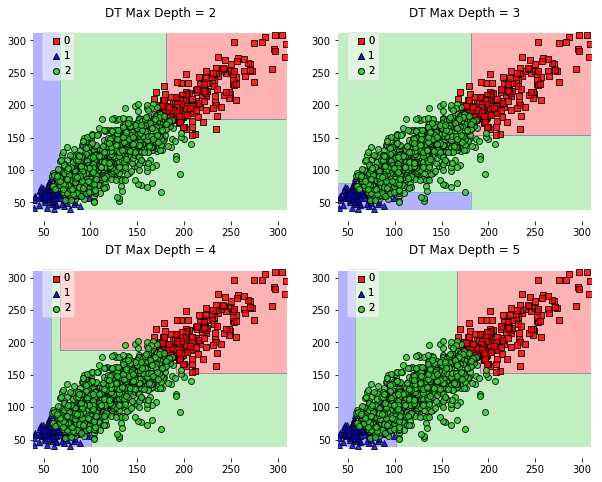

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
import itertools

clf1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2)
clf2 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3)
clf3 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4)
clf4 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5)
      
# Getting a stratified sample of training and test examples                                 
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
train_index, test_index = next(sss.split(X, y))
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]                                           

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         ['DT Max Depth = 2',
                          'DT Max Depth = 3',
                          'DT Max Depth = 4', 
                          'DT Max Depth = 5'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X.as_matrix(), y=y.as_matrix(), clf=clf, legend=2)
    plt.title(lab)
plt.show()